## Visualize stupid thing

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [57]:
rt_df = pd.read_csv('../datasets/Cat_only_rt.csv')

## Correlation Matrix

In [58]:
rs = np.random.RandomState(0)
corr = rt_df[['year', 'occurrenceCount']].corr()
corr.style.background_gradient(cmap='coolwarm')

,year,occurrenceCount
year,1.000000,0.159217
occurrenceCount,0.159217,1.000000


In [59]:
rt_df.head()

,year,stateTerritory,ibraRegion,forest2018Status,forest2013Status,capadStatus,speciesName,occurrenceCount
0,1960,New South Wales,South East Corner,forest,forest,not protected,Felis catus,3
1,1960,New South Wales,South Eastern Highlands,forest,non-forest,not protected,Felis catus,1
2,1960,New South Wales,South Eastern Queensland,forest,forest,not protected,Felis catus,1
3,1960,Australian Capital Territory,South Eastern Highlands,non-forest,non-forest,not protected,Felis catus,1
4,1961,Northern Territory,Daly Basin,forest,non-forest,not protected,Felis catus,1


In [60]:
print(f"Unique\nForest 2013: {rt_df['forest2013Status'].unique()}\nForest 2018: {rt_df['forest2018Status'].unique()}\ncapad Status: {rt_df['capadStatus'].unique()}\nState Territory: {rt_df['stateTerritory'].unique()}")

Unique
Forest 2013: ['forest' 'non-forest']
Forest 2018: ['forest' 'non-forest']
capad Status: ['not protected' 'PA' 'IPA']
State Territory: ['New South Wales' 'Australian Capital Territory' 'Northern Territory'
 'Victoria' 'Queensland' 'Western Australia' 'South Australia' 'Tasmania'
 'Unknown1']


In [61]:
# Quick mapping
rt_df['forest2013BNRY'] = rt_df['forest2013Status'].map({'non-forest': 0, 'forest': 1})
rt_df['forest2018BNRY'] = rt_df['forest2018Status'].map({'non-forest': 0, 'forest': 1})
rt_df['is_protected'] = rt_df['capadStatus'].map({'not protected': 0, 'PA': 1, 'IPA': 2})

In [62]:
rt_df[['forest2013BNRY', 'forest2018BNRY']]

,forest2013BNRY,forest2018BNRY
0,1,1
1,0,1
2,1,1
3,0,0
4,0,1
...,...,...
4944,0,0
4945,0,0
4946,1,1
4947,0,0


In [63]:
from sklearn.preprocessing import OneHotEncoder

# Reshape is needed because the encoder expects a 2D array
data = np.array(['New South Wales', 'South Australia', 'Queensland', 
                 'Northern Territory', 'Tasmania', 'ACT', 'Victoria', 
                 'Western Australia', np.nan, 'Unknown1']).reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data)

In [64]:
rt_df['ibraRegion'].unique()

array(['South East Corner', 'South Eastern Highlands',
       'South Eastern Queensland', 'Daly Basin',
       'Murray Darling Depression', 'Riverina', 'Mulga Lands', 'Pilbara',
       'Sydney Basin', 'Eyre Yorke Block', 'Central Ranges',
       'Flinders Lofty Block', 'Brigalow Belt South',
       'Southern Volcanic Plain', 'MacDonnell Ranges', 'Nullarbor',
       'Victorian Midlands', 'Burt Plain', 'Davenport Murchison Ranges',
       'Finke', 'Simpson Strzelecki Dunefields',
       'NSW South Western Slopes', 'Kanmantoo',
       'Naracoorte Coastal Plain', 'Mitchell Grass Downs',
       'Darling Riverine Plains', 'Gawler', 'South East Coastal Plain',
       'NSW North Coast', 'Great Sandy Desert', 'Sturt Plateau', 'Tanami',
       'Central Mackay Coast', 'Pine Creek', 'Victoria Bonaparte',
       'Cape York Peninsula', 'Darwin Coastal', 'Australian Alps',
       'Brigalow Belt North', 'Arnhem Plateau',
       'Tasmanian Northern Slopes', 'Channel Country', 'Nandewar',
       'Furnea

## Bar Graphs


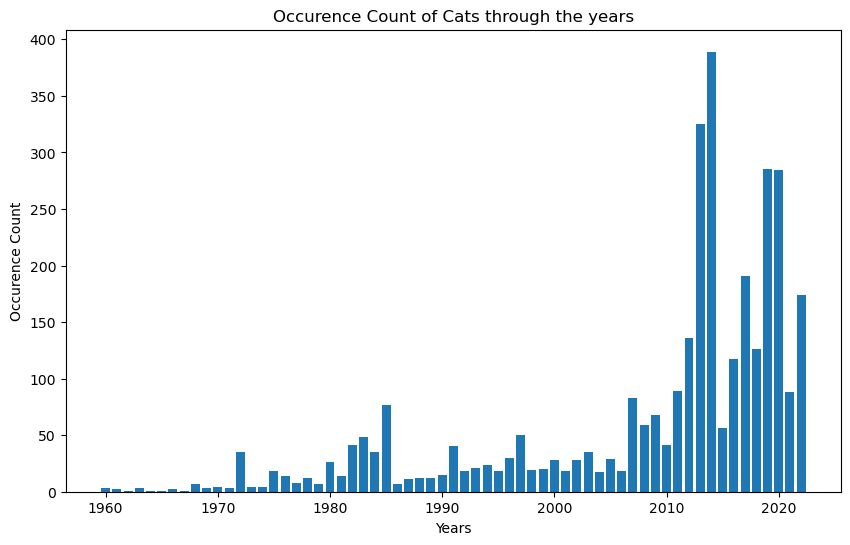

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(rt_df['year'], rt_df['occurrenceCount'])
plt.xlabel('Years')
plt.ylabel('Occurence Count')
plt.title('Occurence Count of Cats through the years')
plt.show()

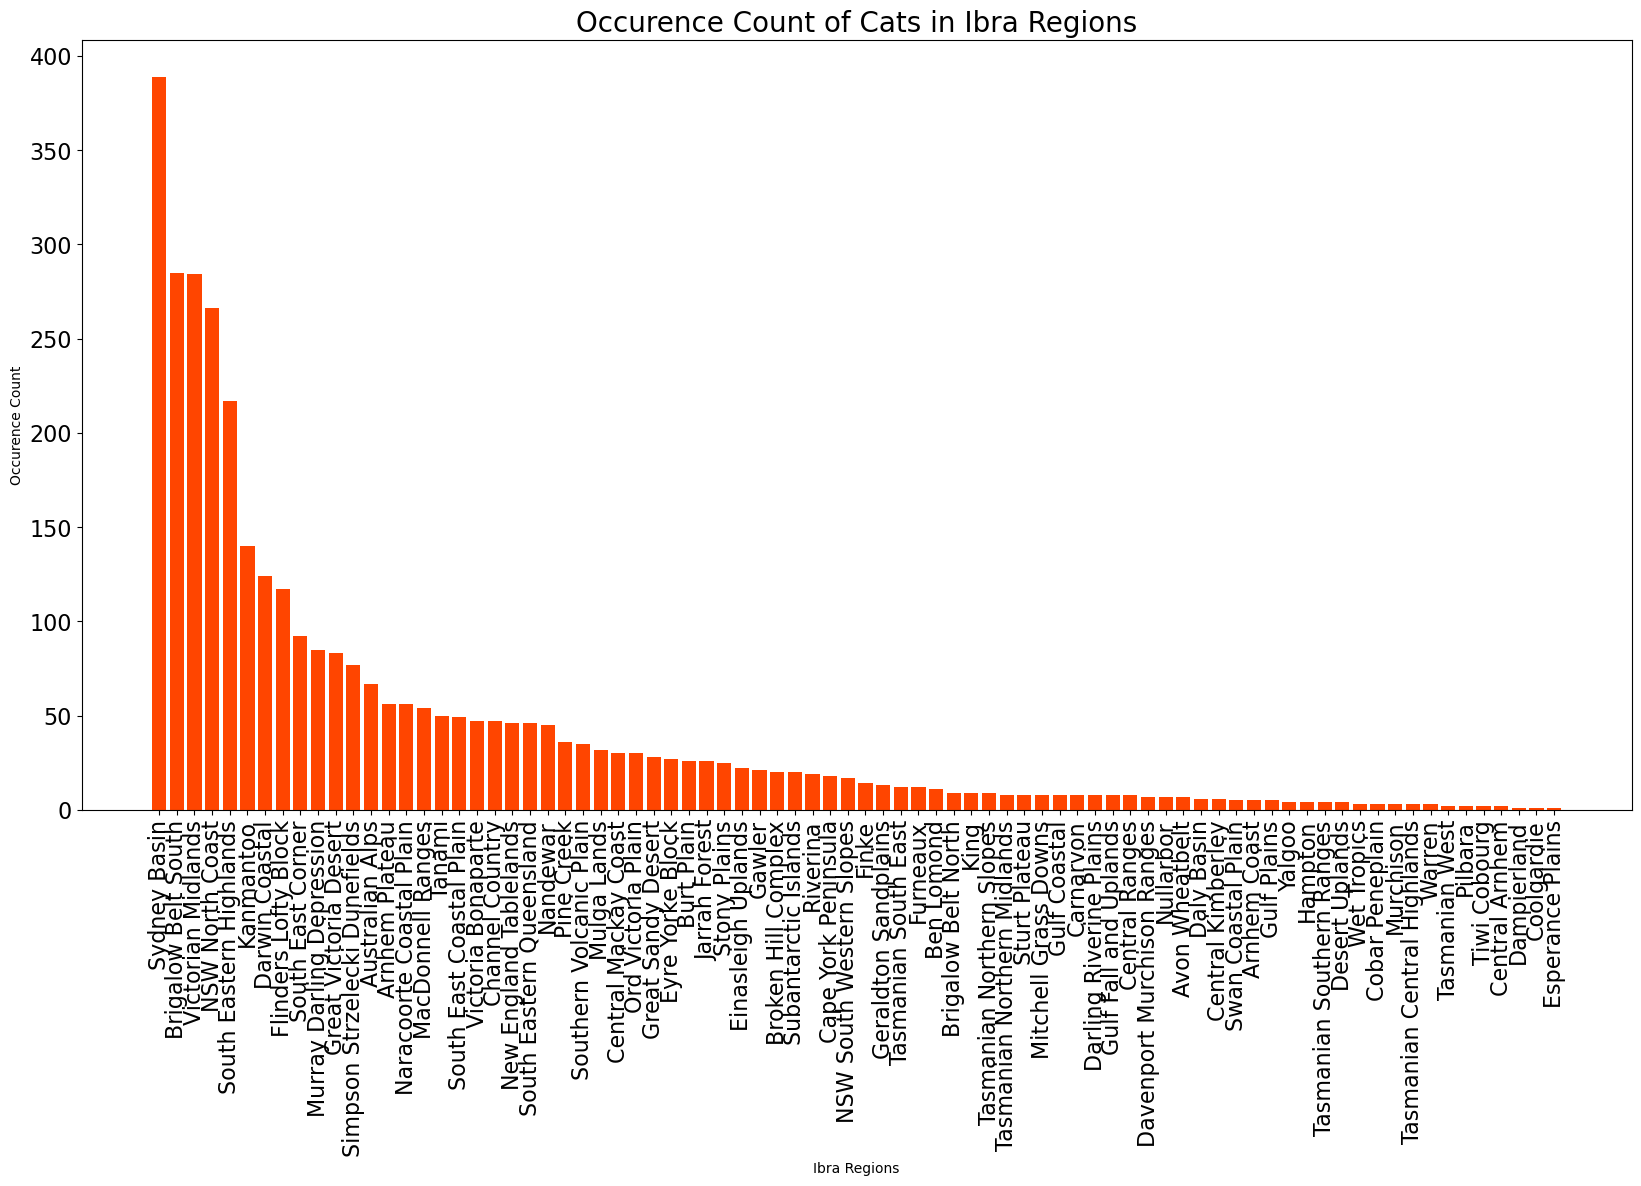

In [82]:
rt_df_sorted = rt_df.sort_values(by='occurrenceCount', ascending=False)
plt.figure(figsize=(20, 10))
plt.bar(rt_df_sorted['ibraRegion'], rt_df_sorted['occurrenceCount'], color='orangered')
plt.xlabel('Ibra Regions')
plt.ylabel('Occurence Count')
plt.title('Occurence Count of Cats in Ibra Regions', fontsize=20)
plt.xticks(rotation = 90, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

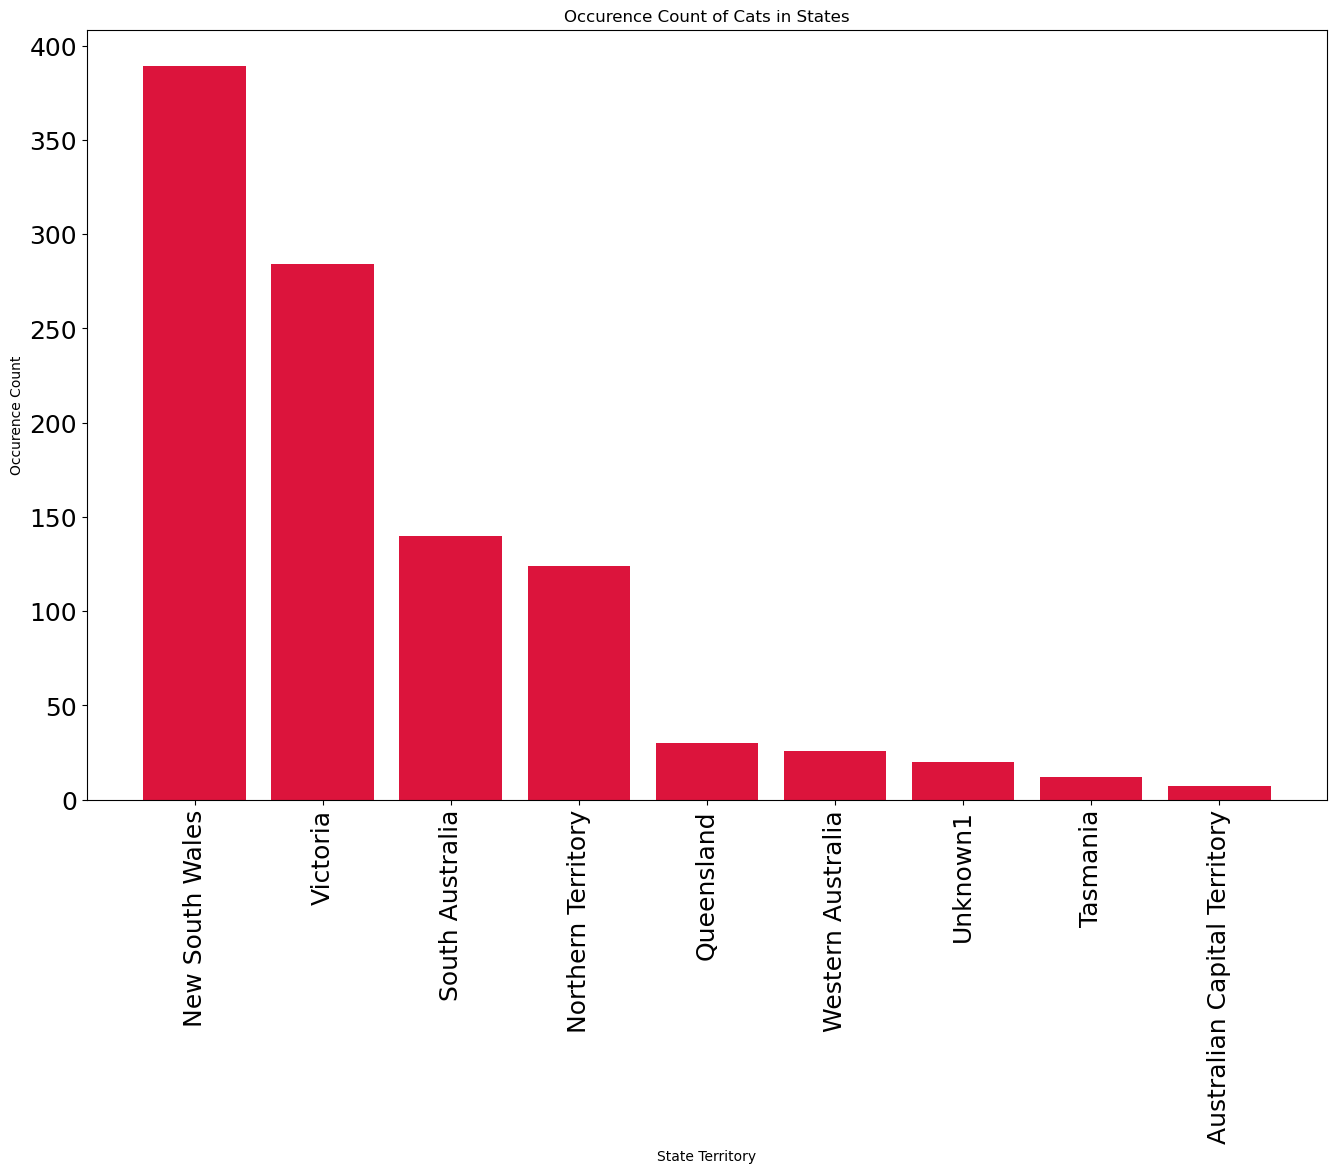

In [80]:
plt.figure(figsize=(16, 10))
plt.bar(rt_df_sorted['stateTerritory'], rt_df_sorted['occurrenceCount'], color='crimson')
plt.xlabel('State Territory')
plt.ylabel('Occurence Count')
plt.title('Occurence Count of Cats in States')
plt.xticks(rotation = 90, fontsize=18)
plt.yticks(fontsize=18)
plt.show()